# DS-HW[4] Data Analysis

## Problem 1. Analysis Model Generation

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("dataset/source.csv")
data.head()

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
0,3086,160049320050,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
1,3086,160049320051,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
2,3086,160049320053,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
3,3086,160049320054,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
4,3086,160049320056,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4


In [162]:
df = data[['motion_idx', 'ang_j3', 'ang_j4', 'ang_j5', 'motion_id']].copy()

df.head()http://localhost:8888/notebooks/Desktop/DS_homework4_blank.ipynb#

,motion_idx,ang_j3,ang_j4,ang_j5,motion_id
0,3086,-0.554516,-0.009215,1.35619,4
1,3086,-0.554516,-0.009215,1.35619,4
2,3086,-0.554516,-0.009215,1.35619,4
3,3086,-0.554516,-0.009215,1.35619,4
4,3086,-0.554516,-0.009215,1.35619,4


In [163]:
df = df.groupby(['motion_idx'], as_index=False).mean()

In [164]:
df

,motion_idx,ang_j3,ang_j4,ang_j5,motion_id
0,3086,-0.696566,0.224850,1.468453,4.0
1,3093,-0.686167,0.210258,1.461789,4.0
2,3100,-0.697572,0.225267,1.468269,4.0
3,3107,-0.692551,0.225480,1.470367,4.0
4,3114,-0.681657,0.201416,1.457061,4.0
...,...,...,...,...,...
3133,74321,-0.762141,0.286843,1.514234,30.0
3134,74332,-0.758629,0.296517,1.513652,30.0
3135,74343,-0.763679,0.280751,1.516581,30.0
3136,74354,-0.760746,0.287172,1.514902,30.0


#### 1) Perform K-means Clustering by calculating the average value of motion units for angles.

In [193]:
init_centroid = df.groupby(['motion_id'], as_index = False).mean()

init_centroid

,motion_id,motion_idx,ang_j3,ang_j4,ang_j5
0,4.0,38786.326454,-0.697183,0.222655,1.441838
1,30.0,39202.592593,-0.757490,0.293065,1.493375


In [194]:
x1, y1, z1 = init_centroid['ang_j3'][0], init_centroid['ang_j4'][0], init_centroid['ang_j5'][0]
x2, y2, z2 = init_centroid['ang_j3'][1], init_centroid['ang_j4'][1], init_centroid['ang_j5'][1]

cluster_data = df[['ang_j3','ang_j4','ang_j5']].copy()

cluster_data

,ang_j3,ang_j4,ang_j5
0,-0.696566,0.224850,1.468453
1,-0.686167,0.210258,1.461789
2,-0.697572,0.225267,1.468269
3,-0.692551,0.225480,1.470367
4,-0.681657,0.201416,1.457061
...,...,...,...
3133,-0.762141,0.286843,1.514234
3134,-0.758629,0.296517,1.513652
3135,-0.763679,0.280751,1.516581
3136,-0.760746,0.287172,1.514902


In [198]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init=np.array([(x1, y1, z1), (x2, y2, z2)])).fit(cluster_data)
cluster_data['motion_id_cluster'] = kmeans.labels_
fianl_centroid = kmeans.cluster_centers_

final_centroid

C:\Users\SEUNGGYU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


array([[ 2.13711265e+04, -7.27574093e-01,  2.58793550e-01,
         1.48643758e+00,  4.30825690e+01,  1.66534408e+01,
         1.00000000e+00],
       [ 5.76265567e+04, -7.25899538e-01,  2.55487215e-01,
         1.44667522e+00,  4.41606530e+01,  1.68550820e+01,
         1.44328993e-15]])

C:\Users\SEUNGGYU\AppData\Local\Temp\ipykernel_15584\2318094211.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = f.gca(projection='3d')


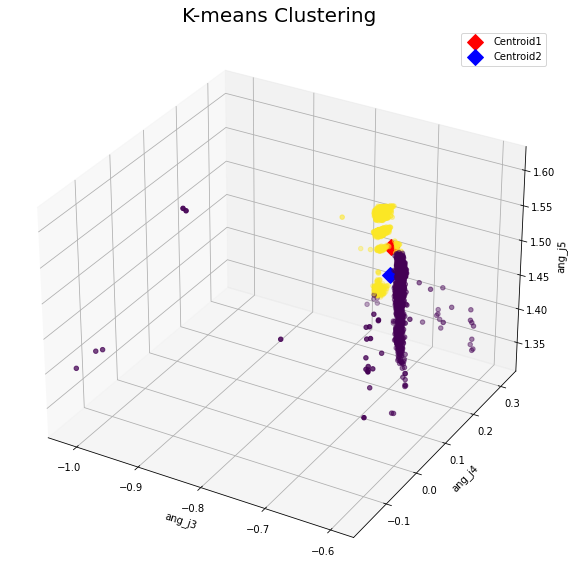

In [200]:
f = plt.figure(figsize = (30, 10))
ax = f.gca(projection='3d')

plt.title("K-means Clustering", fontsize = 20)
ax.scatter(cluster_data["ang_j3"], cluster_data["ang_j4"], cluster_data["ang_j5"], c=cluster_data['motion_id_cluster'])
ax.plot(final_centroid[:,1][0], final_centroid[:,2][0], final_centroid[:,3][0], "rD", markersize=12, label='Centroid1')
ax.plot(final_centroid[:,1][1], final_centroid[:,2][1], final_centroid[:,3][1], "bD", markersize=12, label='Centroid2')

ax.set_xlabel('ang_j3', fontsize = 10)
ax.set_ylabel('ang_j4', fontsize = 10)
ax.set_zlabel('ang_j5', fontsize = 10)

plt.legend()
plt.grid()
plt.show()

#### 2) Perform DBSCAN by calculating the average value of motion units for angles.

C:\Users\SEUNGGYU\AppData\Local\Temp\ipykernel_15584\2315650027.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = f.gca(projection='3d')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


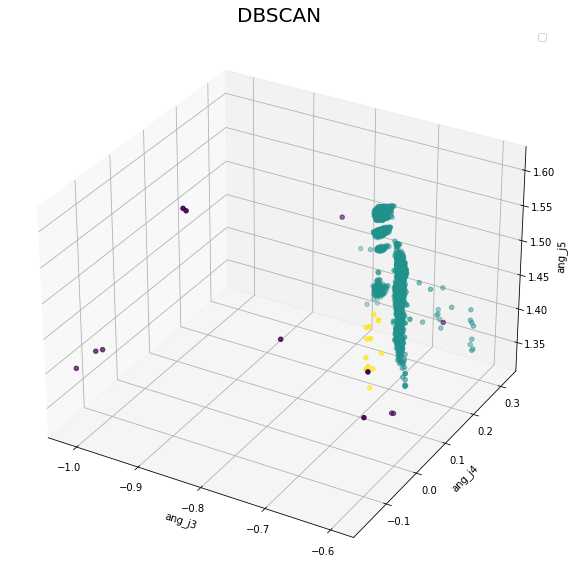

In [156]:
from sklearn.cluster import DBSCAN
db_data = df[['ang_j3', 'ang_j4', 'ang_j5']].copy()
db_scan = DBSCAN(eps=0.04, min_samples=5).fit(db_data.values)
db_data['motion_id_db'] = db_scan.labels_

f = plt.figure(figsize = (30, 10))
ax = f.gca(projection='3d')

plt.title("DBSCAN", fontsize = 20)
ax.scatter(db_data["ang_j3"], db_data["ang_j4"], db_data["ang_j5"], c=db_data['motion_id_db'])
ax.set_xlabel('ang_j3', fontsize = 10)
ax.set_ylabel('ang_j4', fontsize = 10)
ax.set_zlabel('ang_j5', fontsize = 10)

plt.legend()
plt.grid()
plt.show()

C:\Users\SEUNGGYU\AppData\Local\Temp\ipykernel_15584\4246745178.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = f.gca(projection='3d')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


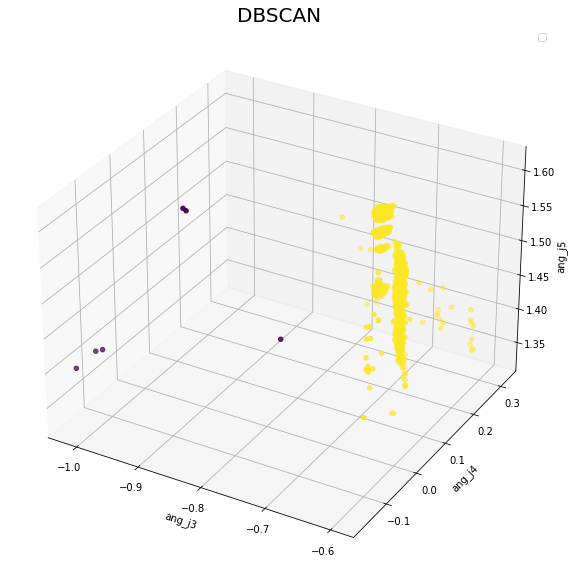

In [154]:
db_data = df[['ang_j3', 'ang_j4', 'ang_j5']].copy()
db_scan = DBSCAN(eps=0.1, min_samples=5).fit(db_data.values)
db_data['motion_id_db'] = db_scan.labels_

db_data

f = plt.figure(figsize = (30, 10))
ax = f.gca(projection='3d')

plt.title("DBSCAN", fontsize = 20)
ax.scatter(db_data["ang_j3"], db_data["ang_j4"], db_data["ang_j5"], c=db_data['motion_id_db'])
ax.set_xlabel('ang_j3', fontsize = 10)
ax.set_ylabel('ang_j4', fontsize = 10)
ax.set_zlabel('ang_j5', fontsize = 10)

plt.legend()
plt.grid()
plt.show()

2-1) K-Means를 진행한 결과와 DBSCAN을 진행한 결과를 비교하면 둘 다 비슷한 개형을 보이는 것을 확인할 수 있다. 하지만 DBSCAN의 경우 eps와 min_samples을 설정할 수 있고 설정값에 따라 결과를 달리한다. eps는 핵심 포인트를 중심으로 측정되는 유클리드 거리값이고, min_samples는 핵심 포인트를 중심점으로 간주하는 주변 지역의 표본 수이다. 이번 데이터는 motion_id가 4인 데이터와 30인 데이터 사이의 차이가 크지 않는 빅데이터다 보니 간주하는 표본 수나 eps 값을 늘리게 되면 다른 id의 데이터를 같은 id 데이터라고 인식할 수 있기 때문에 eps와 min_samples 값의 적당한 값을 찾아서 진행하는 것이 데이터를 잘 분류하는 방법이라고 생각한다. K-Means의 경우 이러한 작업을 진행하지 않고 K-Means를 통해 구해진 centroids로부터의 거리로 데이터 분류를 진행하게되서 앞서 말한 이번 데이터의 속성을 생각해보자면 데이터를 분류하기 쉽지 않았을 것으로 생각할 수 있다. 즉, id가 4인 데이터가 id가 30인 데이터로 분류되기 쉽다는 뜻이다. 하지만 DBSCAN의 경우 적당한 eps와 minsamples을 결정하는 것이 매우 어려운 작업이다. 실제로 위의 그래프는 eps를 0.04로 진행한 것인데 결과가 3개로 분류가 되는 것을 알 수 있다. eps를 0.1로 증가시키면 2개로 분류가 되고 대부분이 노란색을 보이는 것을 알 수 있다. 즉, 데이터를 잘 분류하기 위해서는 dbscan의 기본 설정값을 찾는 작업이 올바르게 진행되어야함을 알 수 있다.

#### 3) Perform k-NN by calculating the average value of motion unit for each angle.

In [176]:
from sklearn.model_selection import train_test_split

KNN_data = df[['ang_j3', 'ang_j4', 'ang_j5', 'motion_id']].copy()

KNN_data_4 = KNN_data[KNN_data['motion_id'] == 4]
KNN_data_30 = KNN_data[KNN_data['motion_id'] == 30]

#### Motion_id 4 model 3개 생성 (+j3, +j4, +j5)

In [189]:
x = KNN_data_4[['motion_id']].values
y = KNN_data_4[['ang_j3']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
KNN_model = KNeighborsRegressor(n_neighbors=3)
KNN_model.fit(x_train, y_train)

train_preds = KNN_model.predict(x_train)
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse1)

train_preds = KNN_model.predict(x_test)
mse2 = mean_squared_error(y_test, train_preds)
rmse2 = sqrt(mse2)

print('rmse : ', rmse1)
print('rmse : ', rmse2)

rmse :  0.019719232975675648
rmse :  0.01061215188853158


In [190]:
y = KNN_data_4[['ang_j4']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
KNN_model = KNeighborsRegressor(n_neighbors=3)
KNN_model.fit(x_train, y_train)

train_preds = KNN_model.predict(x_train)
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse1)

train_preds = KNN_model.predict(x_test)
mse2 = mean_squared_error(y_test, train_preds)
rmse2 = sqrt(mse2)

print('rmse : ', rmse1)
print('rmse : ', rmse2)

rmse :  0.031867506063291307
rmse :  0.02806128508131659


In [191]:
y = KNN_data_4[['ang_j5']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
KNN_model = KNeighborsRegressor(n_neighbors=3)
KNN_model.fit(X_train, y_train)

train_preds = KNN_model.predict(x_train)
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse1)

train_preds = KNN_model.predict(x_test)
mse2 = mean_squared_error(y_test, train_preds)
rmse2 = sqrt(mse2)

print('rmse : ', rmse1)
print('rmse : ', rmse2)

rmse :  0.03416163709304398
rmse :  0.03272477709333491


#### Motion_id 30 model 3개 생성 (+j3, +j4, +j5)

In [291]:
x = KNN_data_30[['motion_id']].values
y = KNN_data_30[['ang_j3']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
KNN_model = KNeighborsRegressor(n_neighbors=3)
KNN_model.fit(x_train, y_train)

train_preds = KNN_model.predict(x_train)
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse1)

train_preds = KNN_model.predict(x_test)
mse2 = mean_squared_error(y_test, train_preds)
rmse2 = sqrt(mse2)

print('rmse : ', rmse1)
print('rmse : ', rmse2)

rmse :  0.055320152967468506
rmse :  0.05529932947873762


In [292]:
y = KNN_data_30[['ang_j4']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
KNN_model = KNeighborsRegressor(n_neighbors=3)
KNN_model.fit(x_train, y_train)

train_preds = KNN_model.predict(x_train)
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse1)

train_preds = KNN_model.predict(x_test)
mse2 = mean_squared_error(y_test, train_preds)
rmse2 = sqrt(mse2)

print('rmse : ', rmse1)
print('rmse : ', rmse2)

rmse :  0.01309106883546406
rmse :  0.020609397587374546


In [293]:
y = KNN_data_30[['ang_j5']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
KNN_model = KNeighborsRegressor(n_neighbors=3)
KNN_model.fit(x_train, y_train)

train_preds = KNN_model.predict(x_train)
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse1)

train_preds = KNN_model.predict(x_test)
mse2 = mean_squared_error(y_test, train_preds)
rmse2 = sqrt(mse2)

print('rmse : ', rmse1)
print('rmse : ', rmse2)

rmse :  0.04745543877729613
rmse :  0.04786752713683542


In [299]:
y = KNN_data_30[['ang_j5']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
KNN_model = KNeighborsRegressor(n_neighbors=10)
KNN_model.fit(x_train, y_train)

train_preds = KNN_model.predict(x_train)
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse1)

train_preds = KNN_model.predict(x_test)
mse2 = mean_squared_error(y_test, train_preds)
rmse2 = sqrt(mse2)

print('rmse : ', rmse1)
print('rmse : ', rmse2)

rmse :  0.03818153739002073
rmse :  0.03887997211340921


In [300]:
y = KNN_data_30[['ang_j5']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
KNN_model = KNeighborsRegressor(n_neighbors=2)
KNN_model.fit(x_train, y_train)

train_preds = KNN_model.predict(x_train)
mse1 = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse1)

train_preds = KNN_model.predict(x_test)
mse2 = mean_squared_error(y_test, train_preds)
rmse2 = sqrt(mse2)

print('rmse : ', rmse1)
print('rmse : ', rmse2)

rmse :  0.06888222111076031
rmse :  0.06899918772205481


#### 4) Perform a Linear Regression analysis on two motions by selecting one kind of temperature.

In [273]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [274]:
a, b = np.random.randint(len(df), size=2)

a, b

(888, 455)

In [275]:
motion = list(set(data['motion_idx']))

motion[a], motion[b]

(43310, 50298)

In [276]:
linear_data_1 = data[data['motion_idx'] == motion[a]]

linear_data_1

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
484191,43310,160136132963,-0.554516,-0.012287,1.31779,44.0,52.0,59.0,4
484192,43310,160136132963,-0.554516,-0.012287,1.31779,44.0,52.0,59.0,4
484193,43310,160136132963,-0.554516,-0.012287,1.31779,44.0,52.0,59.0,4
484194,43310,160136132963,-0.554516,-0.012287,1.31779,44.0,52.0,59.0,4
484195,43310,160136132963,-0.554516,-0.012287,1.31779,44.0,52.0,59.0,4
...,...,...,...,...,...,...,...,...,...
484902,43310,160136133170,-0.920038,0.569815,1.58657,42.0,52.0,59.0,4
484903,43310,160136133170,-0.920038,0.569815,1.58657,42.0,52.0,59.0,4
484904,43310,160136133170,-0.920038,0.569815,1.58657,42.0,52.0,59.0,4
484905,43310,160136133170,-0.920038,0.569815,1.58657,42.0,52.0,59.0,4


In [277]:
linear_data_2 = data[data['motion_idx'] == motion[b]]

linear_data_2

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
551479,50298,160145390873,-0.554017,-0.013823,1.32087,40.0,49.0,51.0,4
551480,50298,160145390873,-0.554017,-0.013823,1.32087,40.0,49.0,51.0,4
551481,50298,160145390873,-0.554017,-0.013823,1.32087,40.0,49.0,51.0,4
551482,50298,160145390873,-0.554017,-0.013823,1.32087,40.0,49.0,51.0,4
551483,50298,160145390873,-0.554017,-0.013823,1.32087,40.0,49.0,51.0,4
...,...,...,...,...,...,...,...,...,...
552358,50298,160145391071,-0.919041,0.571351,1.58811,42.0,49.0,51.0,4
552359,50298,160145391071,-0.919041,0.571351,1.58811,42.0,49.0,51.0,4
552360,50298,160145391071,-0.919041,0.571351,1.58811,42.0,49.0,51.0,4
552361,50298,160145391072,-0.919041,0.571351,1.58811,42.0,49.0,51.0,4


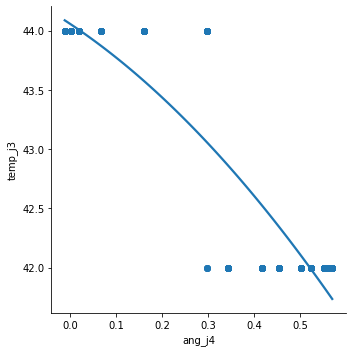

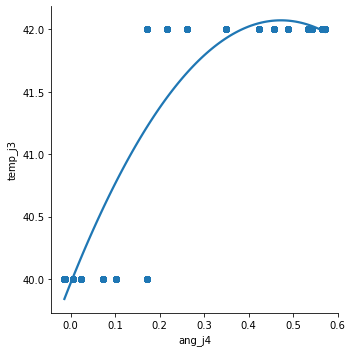

In [278]:
sns.lmplot(x ="ang_j4", y ="temp_j3", data = linear_data_1, order = 2, ci = None)
sns.lmplot(x ="ang_j4", y ="temp_j3", data = linear_data_2, order = 2, ci = None)

In [279]:
x_1 = np.array(linear_data_1['ang_j4']).reshape(-1, 1)
y_1 = np.array(linear_data_1['temp_j3']).reshape(-1, 1)
x_2 = np.array(linear_data_2['ang_j4']).reshape(-1, 1)
y_2 = np.array(linear_data_2['temp_j3']).reshape(-1, 1)

x1_train, x1_test, y1_train, y1_test = train_test_split(x_1, y_1, test_size = 0.25)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_2, y_2, test_size = 0.25)

regr1 = LinearRegression()
regr1.fit(x1_train, y1_train)
regr2 = LinearRegression()
regr2.fit(x2_train, y2_train)

print(regr1.score(x1_test, y1_test))
print(regr2.score(x2_test, y2_test))

0.9017950314911355
0.8142640771040448


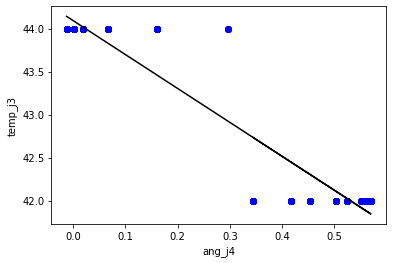

In [280]:
y1_pred = regr1.predict(x1_test)

plt.scatter(x1_test, y1_test, color ='b')
plt.plot(x1_test, y1_pred, color ='k')
plt.xlabel('ang_j4')
plt.ylabel('temp_j3')

plt.show()

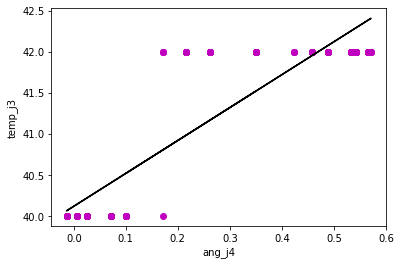

In [281]:
y2_pred = regr2.predict(x2_test)

plt.scatter(x2_test, y2_test, color ='m')
plt.plot(x2_test, y2_pred, color ='k')
plt.xlabel('ang_j4')
plt.ylabel('temp_j3')

plt.show()

#### 5) Perform a Logistic Regression analysis on two motions by selecting one kind of temperature.

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_data_1 = linear_data_1[['tick', 'ang_j4', 'temp_j3']]
logistic_data_2 = linear_data_2[['tick', 'ang_j4', 'temp_j3']]

logistic_data_1

,tick,ang_j4,temp_j3
484191,160136132963,-0.012287,44.0
484192,160136132963,-0.012287,44.0
484193,160136132963,-0.012287,44.0
484194,160136132963,-0.012287,44.0
484195,160136132963,-0.012287,44.0
...,...,...,...
484902,160136133170,0.569815,42.0
484903,160136133170,0.569815,42.0
484904,160136133170,0.569815,42.0
484905,160136133170,0.569815,42.0


In [308]:
logistic_data_2

,tick,ang_j4,temp_j3
551479,160145390873,-0.013823,40.0
551480,160145390873,-0.013823,40.0
551481,160145390873,-0.013823,40.0
551482,160145390873,-0.013823,40.0
551483,160145390873,-0.013823,40.0
...,...,...,...
552358,160145391071,0.571351,42.0
552359,160145391071,0.571351,42.0
552360,160145391071,0.571351,42.0
552361,160145391072,0.571351,42.0


In [309]:
train1, test1 = train_test_split(logistic_data_1, test_size=0.2, random_state=1)
train1, val1 = train_test_split(train1, test_size = 0.15, random_state=1)

train1.shape, val1.shape, test1.shape

((486, 3), (86, 3), (144, 3))

In [310]:
train2, test2 = train_test_split(logistic_data_2, test_size=0.2, random_state=1)
train2, val2 = train_test_split(train2, test_size = 0.15, random_state=1)

train2.shape, val2.shape, test2.shape

((600, 3), (107, 3), (177, 3))

In [311]:
feature = ["tick", "ang_j4"]
target = "temp_j3"

x1_train = train1[feature]
y1_train = train1[target]

x1_val = val1[feature]
y1_val = val1[target]

x1_test = test1[feature]
y1_test = test1[target]

print("feature Matrix: ", x1_train.shape, x1_val.shape, x1_test.shape)
print("target vector: ", y1_train.shape, y1_val.shape, y1_test.shape)

feature Matrix:  (486, 2) (86, 2) (144, 2)
target vector:  (486,) (86,) (144,)


In [312]:
feature = ["tick", "ang_j4"]
target = "temp_j3"

x2_train = train2[feature]
y2_train = train2[target]

x2_val = val2[feature]
y2_val = val2[target]

x2_test = test2[feature]
y2_test = test2[target]

print("feature Matrix: ", x2_train.shape, x2_val.shape, x2_test.shape)
print("target vector: ", y2_train.shape, y2_val.shape, y2_test.shape)

feature Matrix:  (600, 2) (107, 2) (177, 2)
target vector:  (600,) (107,) (177,)


In [313]:
x1_total = pd.concat([x1_train, x1_test])
y1_total = pd.concat([y1_train, y1_test])

scaler = StandardScaler()

x1_total_scaled = scaler.fit_transform(x1_total)
x1_test_scaled = scaler.transform(x1_test)

model1 = LogisticRegression()
model1.fit(x1_total_scaled, y1_total)

print("test 데이터셋 정확도")
model1.score(x1_test_scaled, y1_test)

test 데이터셋 정확도


0.9930555555555556

In [319]:
x2_total = pd.concat([x2_train, x2_test])
y2_total = pd.concat([y2_train, y2_test])

scaler = StandardScaler()

x2_total_scaled = scaler.fit_transform(x2_total)
x2_test_scaled = scaler.transform(x2_test)

model2 = LogisticRegression()
model2.fit(x2_total_scaled, y2_total)

print("test 데이터셋 정확도")
model2.score(x2_test_scaled, y2_test)

test 데이터셋 정확도


0.9887005649717514

2-2, 2-3, 2-4) KNN을 진행한 결과와 linear regression, logistic regression을 진행한 결과를 비교하기 위해선 이 세 방법의 정의에 대해서 고려해볼 필요가 있다. KNN의 경우 근처에 K개의 비슷한 값을 통해 데이터를 분류하는 방법이고, linear regression이란 종속 변수 y와 한 개 이상의 독립 변수 x와의 선형 관계를 파악하는 것이다. 마지막으로 logistic regression 또한 독립 변수와 종속 변수의 관계를 설명하기에 linear regression과 유사하다. 다른 점이라면 linear regression과는 다르게 입력 데이터에 따라 결과 데이터가 특정 분류로 나뉘기에 분류 기법으로 사용된다. 즉, 방법은 linear regression과 비슷하고, 결과는 KNN과 비슷하다고 생각할 수 있다.

우선 이번에 진행한 KNN과 linear regression은 다른 변수들을 이용하였기에 결과값을 비교하는 것은 의미가 있다고 생각하진 않는다. 그렇기에 각기의 결과값을 분석하고, 이에 대한 관계를 나타내보려고 한다.

KNN의 경우 각 motion_id에 각 angle마다를 통해 분류 작업을 진행하였다. 예를 들면motion_id가 4인 데이터의 ang_j3 데이터들의 비슷한 정도를 측정한 것으로 생각하면 된다. 이들의 정확도를 측정하기 위해 R-squared 방법으로 구했으나, 매우 낮은 값들이 도출되었다. 이러한 결과는 KNN을 사용하는데 있어 유의점에 대해서 생각할 수 있다. KNN의 경우 K의 값을 어떻게 설정을 하는지가 매우 중요하고, 데이터셋의 크기가 불균형한 경우 상당히 조심해서 설정을 해야한다. 처음엔 K를 3으로 선택하여 돌린 결과는 매우 낮았고 이는 데이터가 불균형하게 되어있어 3개로는 분류하기가 쉽지 않았다는 것을 증명한다고 볼 수 있다. 따라서 정확도값과 k값의 관계를 확인하기 위해 마지막 모델의 k값을 2와 10으로 변경하여 진행하였더니 2에서는 RMSE값이 증가한 것을 확인할 수 있고 10에서는 오히려 감소한 것을 확인할 수 있다. 즉, 데이터들이 불균형하게 퍼져있어 k값을 늘리는건 오히려 정확도를 낮추는 것으로 볼 수 있다.

linear regression의 경우 motion_idx 중 랜덤으로 2개를 선택하여 선택된 motion_idx의 데이터를 따로 뽑아내고, 이 데이터의 feature 중 temp와 ang 한 개씩을 선택하고 독립변수 ang에 대한 종속변수 temp에 대한 관계를 출력해보았다. 앞서서 KNN을 진행했을 때는 temp에 관해서 진행하지는 않았지만 데이터가 매우 불균형하게 퍼져있다는 것을 확인할 수 있었다. 그렇기에 이러한 안좋은 결과가 나타난 것일 수도 있고, ang과 temp 사이에는 명확한 관계가 존재하지 않는 것일 수도 있다.

Logistic regression의 경우 linear regression에서 tick 데이터를 학습에 추가시켜 진행하였다. logistic regression을 진행하기 앞서 train, val, test을 나눠 학습을 진행하였고, 정확도를 측정하였다. 앞서 KNN과 linear regression 모두 낮은 정확도를 보여줬기에 이번에도 낮은 정확도를 보일 것이라고 예상할 수 있다. 하지만 예상한 것과는 다르게 진행한 두 번의 motion_idx 모두 높은 정확도를 보였다. 이러한 결과값만 보면 좋게 생성된 모델같지만 앞의 결과들을 통해서 여기서만 이러한 정확도를 보이는 것은 모델 생성에 있어 문제가 있을 것이라고 예상할 수 있다. 또한 overfitting 문제를 생각해볼 수도 있다.

따라서 올바른 모델을 생성해서 높은 정확도를 얻기 위해선 데이터에 대한 올바른 이해가 동반되어야함을 알 수 있고, 이번에 주어진 빅데이터 같은 경우 설정값을 바꿔주면서 여러번의 반복 수행을 통해 올바른 모델 생성에 시간과 노력을 투자해야함을 알 수 있다.